# ***House Rent Prediction***


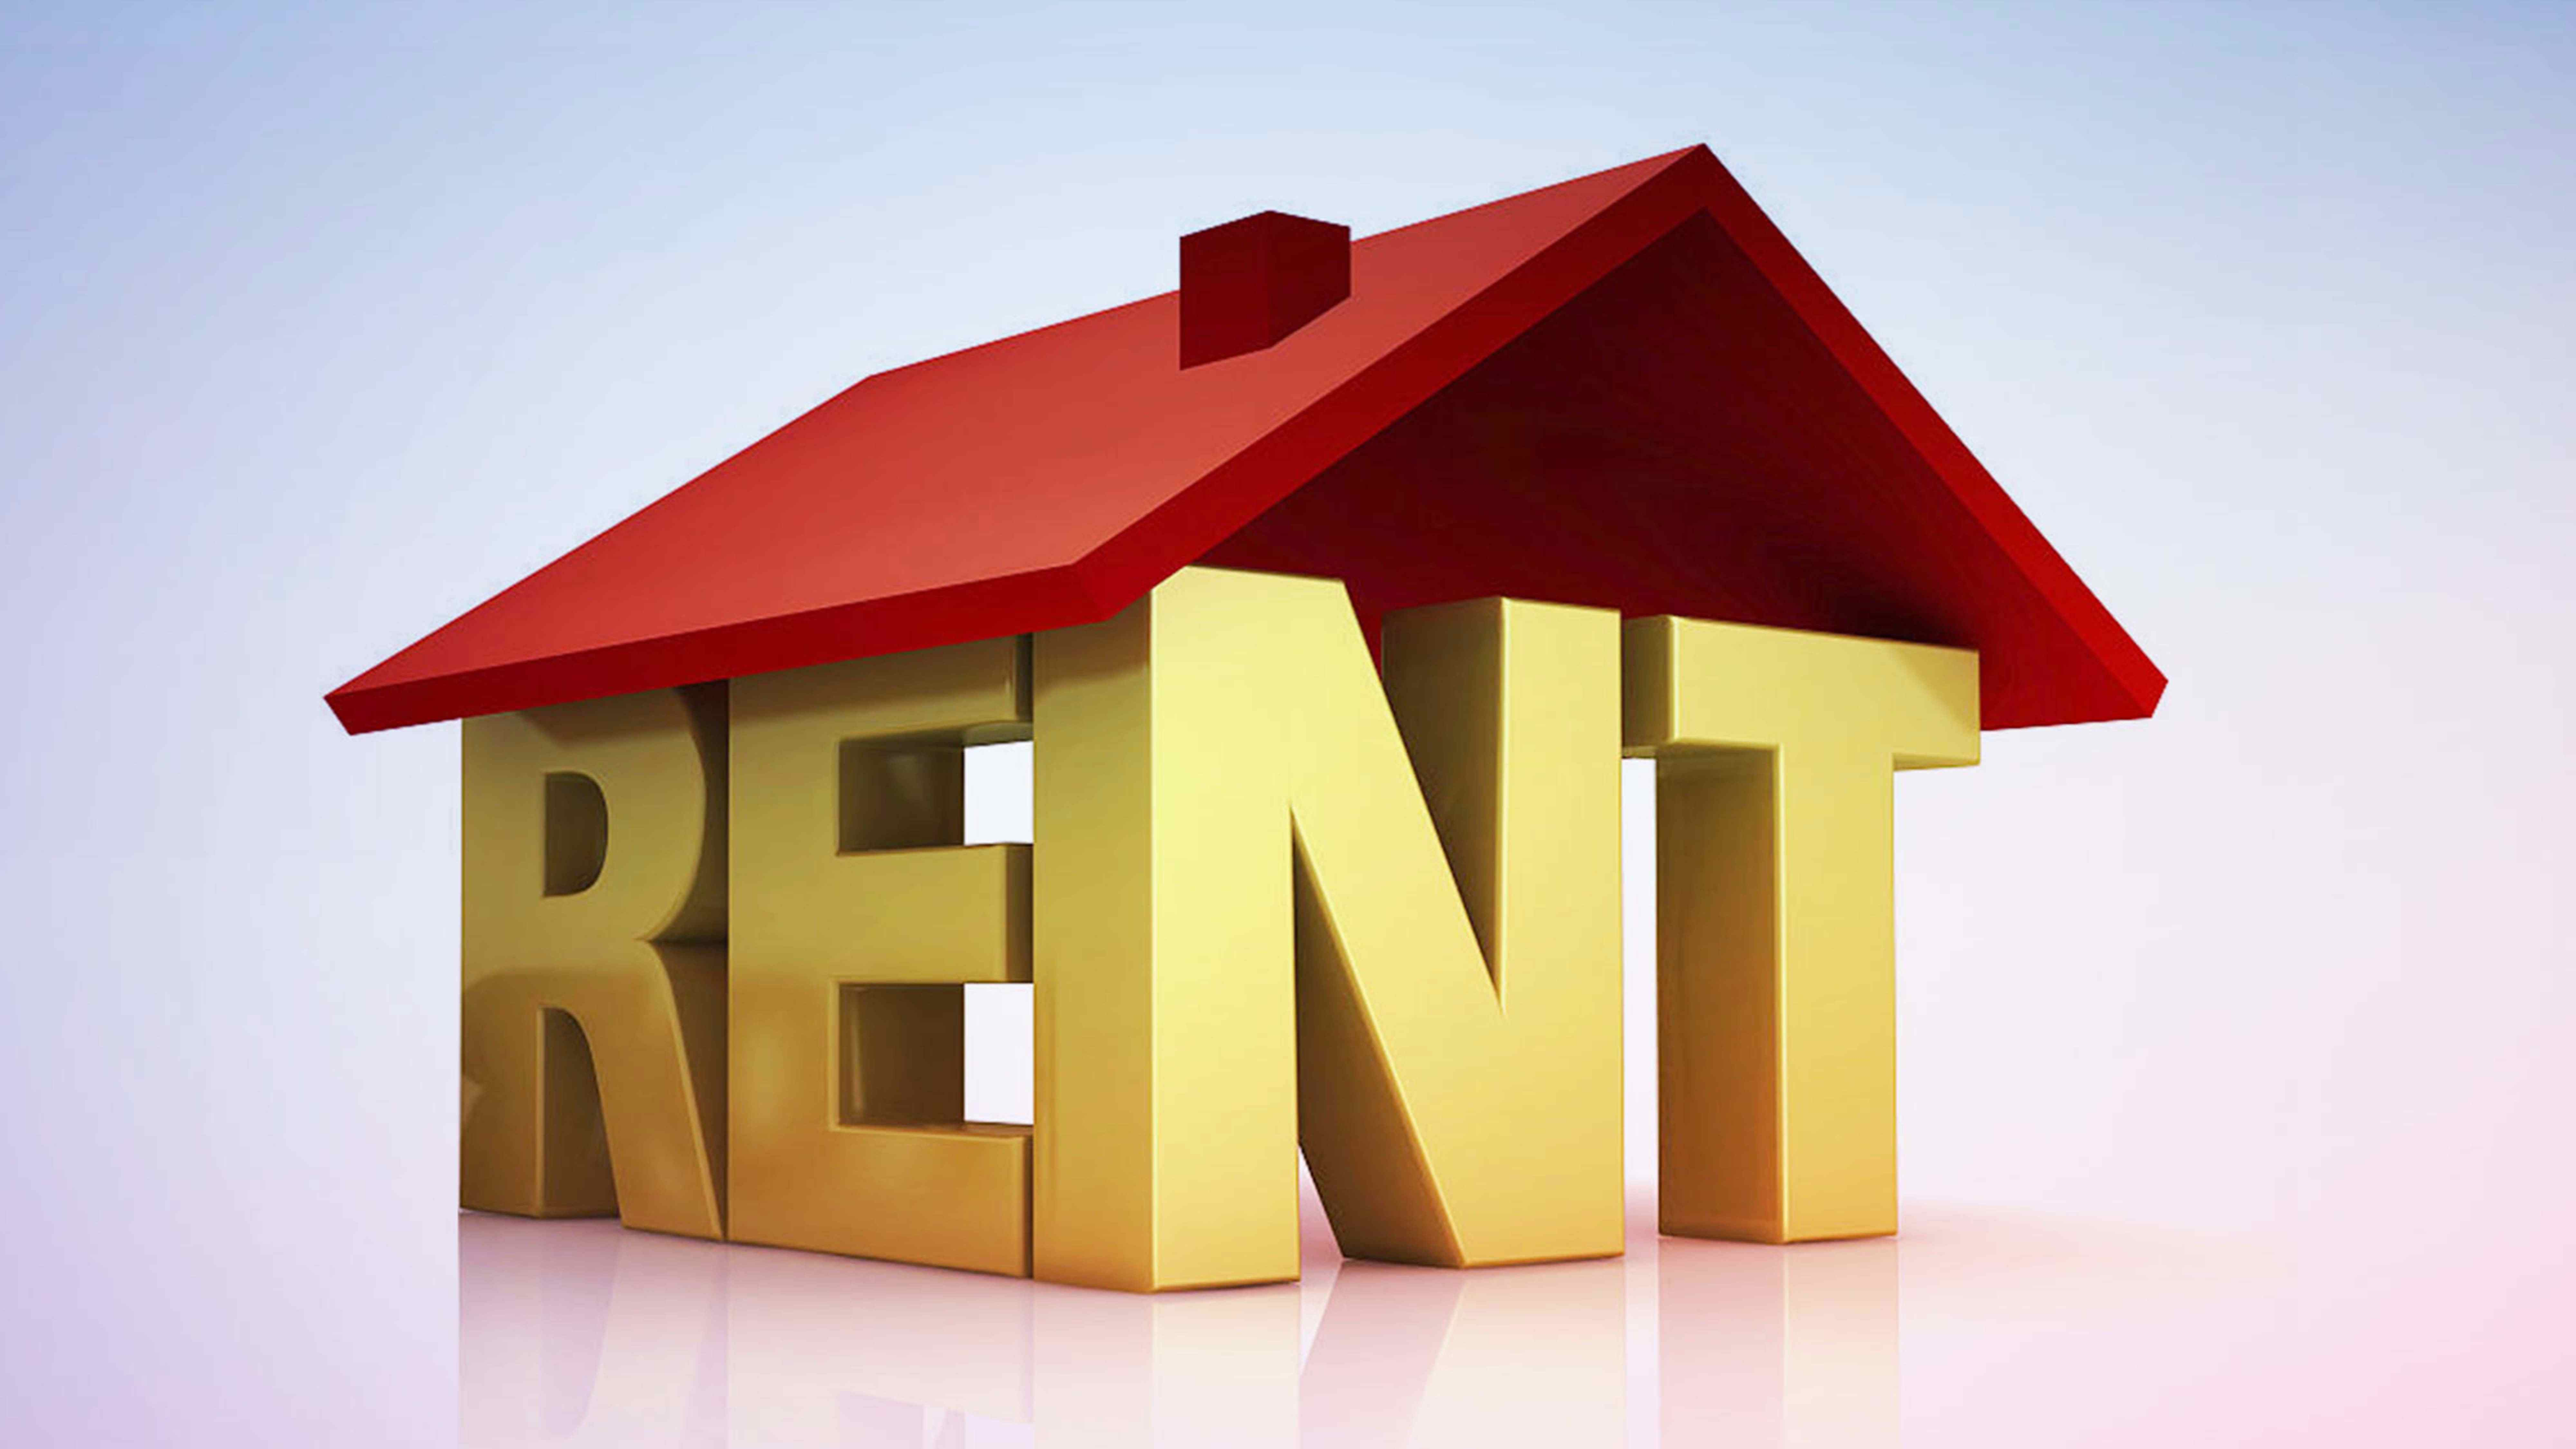

Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.

---



**The goal is to make a model that could predict the rental price of a house**

**Content**

In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

**Dataset**

- **BHK**: Number of Bedrooms, Hall, Kitchen.
- **Rent**: Rent of the Houses/Apartments/Flats.
- **Size**: Size of the Houses/Apartments/Flats in Square Feet.
- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality**: Locality of the Houses/Apartments/Flats.
- **City**: City where the Houses/Apartments/Flats are Located.
- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.
- **Bathroom**: Number of Bathrooms.
- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

---



In [22]:
# import basic libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import pylab
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

# Load the Data

In [23]:
df = pd.read_csv('.../House_Rent_Prediction/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [24]:
df.shape

(4746, 12)

In [25]:
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

'Built Area' has only 2 values, so we can replace it.

In [26]:
df['Area Type'].replace({'Built Area': 'Super Area'}, inplace=True)

In [27]:
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Carpet Area    2298
Super Area     2448
Name: Area Type, dtype: int64

In [28]:
df.groupby('Point of Contact')['Point of Contact'].agg('count')

Point of Contact
Contact Agent      1529
Contact Builder       1
Contact Owner      3216
Name: Point of Contact, dtype: int64

There is only one 'Contact Builder', replace it on 'Contact Owner'

In [29]:
df['Point of Contact'].replace({'Contact Builder': 'Contact Owner'}, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [10]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,2,2235,6,3,3,NaN,2
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2448,37,972,2251,3444,NaN,3217
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


There is no missing values on dataset.

In [12]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [31]:
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


Create columns 'Month' and 'Day'

In [32]:
df['Month'] = df['Posted On'].dt.month
df['Day'] = df['Posted On'].dt.day
df.drop(['Posted On'], axis=1, inplace=True)

In [33]:
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,18
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,15
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,10
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  Month              4746 non-null   int64 
 12  Day                4746 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 482.1+ KB


In [41]:
def plot_histogram(df, col):
  fig = px.histogram(x=df[col], 
                     color_discrete_sequence=px.colors.sequential.Viridis,
                     text_auto=True).update_xaxes(categoryorder='total descending')
  fig.show()


def plot_pie(df, col):
  fig = px.pie(values=df[col].value_counts().values,
               names=df[col].value_counts().index,
               color_discrete_sequence=px.colors.sequential.Viridis)
  fig.update_traces(textinfo='label+percent+value', textfont_size=15)
  fig.show()

In [34]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [42]:
plot_histogram(df,'City')
plot_pie(df,'City')

Mumbai, Chennal, Bangalore and Hyderabad are the most popular for renting houses

In [44]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

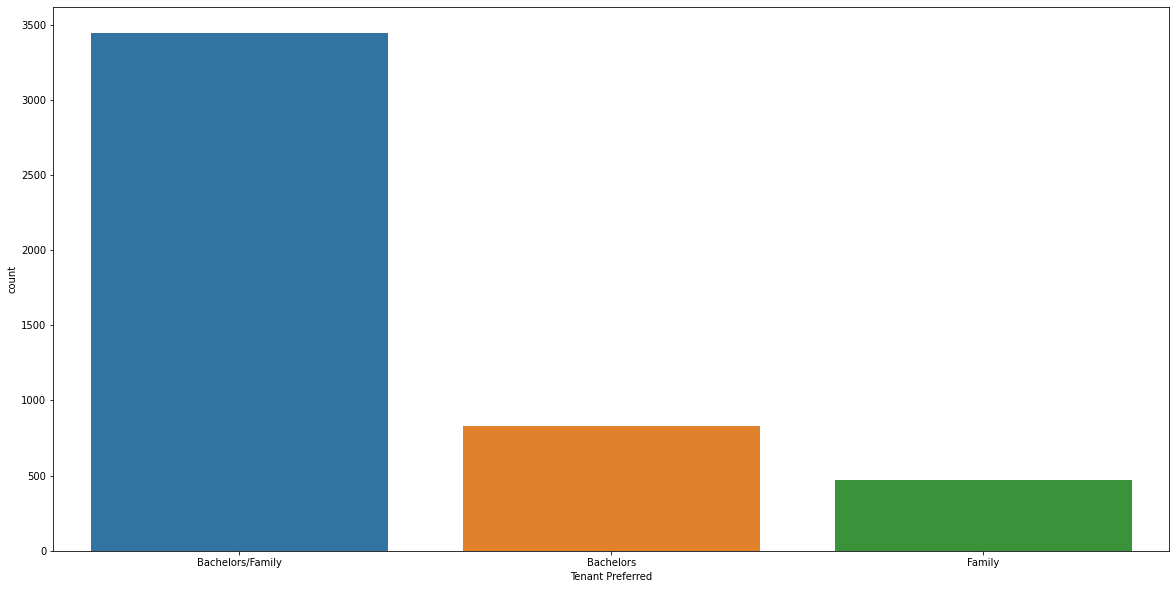

In [45]:
sns.countplot('Tenant Preferred', data=df)

In [46]:
plot_pie(df, 'Tenant Preferred')

The most popular is a bachelors/family house

Next we should handle with 'Floor' column

In [ ]:
df.Floor.unique()

In [48]:
df['Renting_Floor'] = [x.split(' out of ')[0] for x in df['Floor'].values]

In [49]:
df.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,Ground
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1


In [50]:
df['Renting_Floor'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [51]:
df['Renting_Floor'].replace(['Ground', 'Upper Basement', 'Lower Basement'], 
                            [0, -1, -2], inplace=True)

In [52]:
df.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,0
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1


In [53]:
df.drop(df[df['Floor'] == 'Ground'].index, axis=0, inplace=True)
df.drop(df[df['Floor'] == '3'].index, axis=0, inplace=True)
df.drop(df[df['Floor'] == '1'].index, axis=0, inplace=True)
df['Total_Floor'] = [x.split(' out of ')[1] for x in df['Floor'].values]

In [54]:
df.head(10)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,0,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,1,2
5,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,4,29,0,1
6,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,6,21,0,4
7,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent,6,21,1,2
8,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent,6,7,1,2
9,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,6,20,1,3


In [56]:
plot_histogram(df,'Renting_Floor')

In [57]:
plot_histogram(df,'Furnishing Status')
plot_pie(df,'Furnishing Status')

In [69]:
avg_rent_furn = df.groupby('Furnishing Status')['Rent'].mean().sort_values(ascending=False).round(3)

In [71]:
fig = px.bar(avg_rent_furn,x=avg_rent_furn.index,y=avg_rent_furn.values,
             color=avg_rent_furn.index, title='Average Rent(Furnishing Status)',
             text=avg_rent_furn.values)
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title='Furnishing Status',
    yaxis_title='Average Rent'
)
fig.show()

In [70]:
avg_rent_furn

Furnishing Status
Furnished         56227.150
Semi-Furnished    38729.352
Unfurnished       22462.993
Name: Rent, dtype: float64

In [58]:
fig = px.scatter(df, x='Size', y='Rent', color='BHK',size='Size',hover_data=['Rent'])
fig.update_layout(title='House Sizes and Rents')
fig.show()

In [59]:
fig = px.scatter(df, x='BHK', y='Rent', color='City',size='BHK',hover_data=['Rent'])
fig.update_layout(title='House BHK and Rents')
fig.show()

In [75]:
fig = px.scatter(df, x='Size', y='Rent', color='Bathroom',size='Size',hover_data=['Rent'])
fig.update_layout(title='Bathroom and Rent')
fig.show()

In [76]:
fig = px.scatter(df, x='Bathroom', y='Rent', color='City',size='Bathroom',hover_data=['Rent'])
fig.update_layout(title='House Bathroom and City')
fig.show()

There are some outliers

In [60]:
avg_size = df.groupby('City')['Size'].mean().sort_values(ascending=False).round(3)

In [61]:
fig = px.bar(avg_size,x=avg_size.index,y=avg_size.values,
             color=avg_size.index, title='Average Size per City',
             text=avg_size.values)
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Average Size'
)
fig.show()

In [66]:
avg_rent = df.groupby('City')['Rent'].mean().sort_values(ascending=False).round(3)

In [67]:
avg_rent

City
Mumbai       85321.205
Delhi        29496.683
Bangalore    24966.366
Chennai      21614.092
Hyderabad    20567.878
Kolkata      11645.174
Name: Rent, dtype: float64

In [68]:
fig = px.bar(avg_rent,x=avg_rent.index,y=avg_rent.values,
             color=avg_rent.index, title='Average Rent per City',
             text=avg_rent.values)
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Average Rent'
)
fig.show()

In [78]:
plot_pie(df, 'Area Type')

In [79]:
avg_rent_area_type = df.groupby('Area Type')['Rent'].mean().sort_values(ascending=False).round(3)

In [80]:
fig = px.bar(avg_rent_area_type,x=avg_rent_area_type.index,y=avg_rent_area_type.values,
             color=avg_rent_area_type.index, title='Average Rent by Area Type',
             text=avg_rent_area_type.values)
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title='Area Type',
    yaxis_title='Average Rent'
)
fig.show()

In [81]:
fig = px.scatter(df, y="Area Type", x="Rent", color="City", symbol="City")
fig.update_traces(marker_size=10)
fig.show()

Rent distribution

In [82]:
fig = px.histogram(df, x="Rent", y="City", color='City',log_x=True)
fig.show()

Convert 'Tenant Preferred' into integers

In [83]:
df['Tenant Preferred'].replace(['Bachelors/Family', 'Bachelors', 'Family'],
                               [0, 1, 2], inplace=True)
df['Tenant Preferred'].unique()

array([0, 1, 2])

In [84]:
df.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,0,2,Contact Owner,5,18,0,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,0,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,0,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,0,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,1,Contact Owner,5,9,1,2


In [ ]:
#!pip install black
#!pip install click

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report

In [ ]:
create_report(df)

In [89]:
fig = px.box(df, y="Size", log_y=True)
fig.show()

In [88]:
fig = px.box(df, x="Rent",log_x=True)
fig.show()

In [90]:
fig = px.box(df, x="Bathroom",log_x=False)
fig.show()

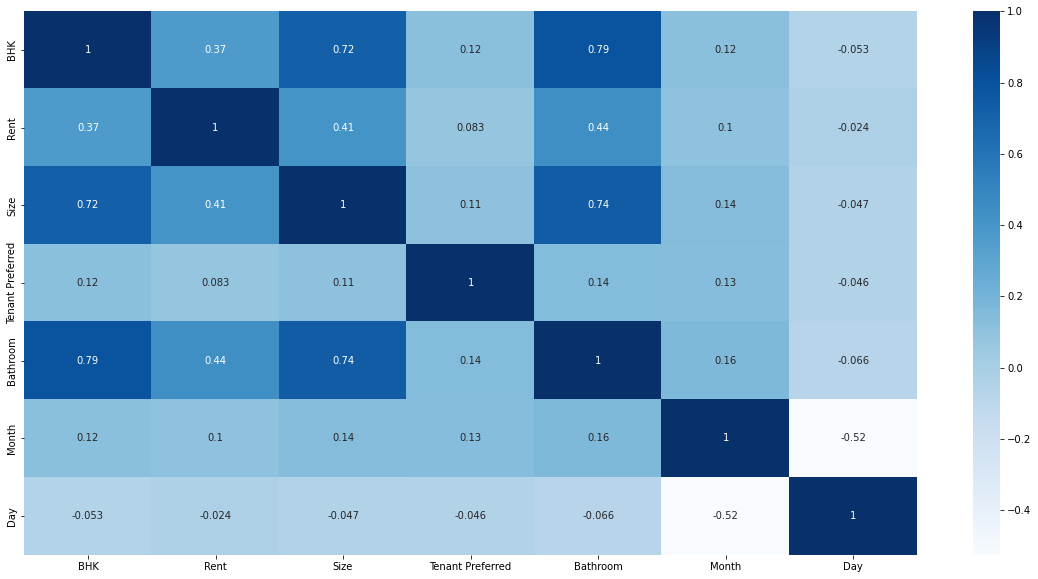

In [ ]:
sns.heatmap(data=df.corr(), cmap='Blues', annot=True)

# Handle with Outliers

In [91]:
def outlier_thresholds(data, col_name, q1=0.25, q3=0.75):
  quartile_1 = data[col_name].quantile(q1)
  quartile_3 = data[col_name].quantile(q3)
  c_range = quartile_3 - quartile_1
  up_limit = quartile_3 + 1.5 * c_range
  low_limit = quartile_1 - 1.5 * c_range
  return low_limit, up_limit


def check_out(data, col_name):
  low_limit, up_limit = outlier_thresholds(data, col_name)
  if data[(data[col_name] > up_limit) | (data[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [92]:
num_col = [i for i in df.columns if df[i].dtypes != "O"]

In [93]:
num_col

['BHK', 'Rent', 'Size', 'Tenant Preferred', 'Bathroom', 'Month', 'Day']

In [94]:
for i in num_col:
  print(i, check_out(df, i))

BHK True
Rent True
Size True
Tenant Preferred False
Bathroom True
Month False
Day False


In [95]:
def replace_by_thresholds(data, var):
  low_limit, up_limit = outlier_thresholds(data, var)
  data.loc[(data[var] < low_limit), var] = low_limit
  data.loc[(data[var] > up_limit), var] = up_limit

In [96]:
replace_by_thresholds(df, 'Rent')
replace_by_thresholds(df, 'Size')


for i in num_col:
  print(i, check_out(df, i))

BHK True
Rent False
Size False
Tenant Preferred False
Bathroom True
Month False
Day False


In [97]:
fig = px.box(df, y="Size", log_y=True)
fig.show()

In [98]:
fig = px.box(df, x="Rent",log_x=True)
fig.show()

# Data Cleaning

In [99]:
df.head(10)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,0,2,Contact Owner,5,18,0,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,0,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,0,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,0,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,1,Contact Owner,5,9,1,2
5,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,0,2,Contact Owner,4,29,0,1
6,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,1,2,Contact Agent,6,21,0,4
7,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,1,1,Contact Agent,6,21,1,2
8,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,1,2,Contact Agent,6,7,1,2
9,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,0,2,Contact Owner,6,20,1,3


In [100]:
df.groupby('Area Locality')['Area Locality'].agg('count')

Area Locality
 Beeramguda, Ramachandra Puram, NH 9     1
 in Boduppal, NH 2 2                     1
 in Erragadda, NH 9                      1
 in Miyapur, NH 9                        1
117 Residency, Chembur East              1
                                        ..
vanamali chs ghatla, Ghatla              1
venkatapuram                             1
venkatesa perumal nagar                  1
villvam towers tnhb colony               1
whitefield                              12
Name: Area Locality, Length: 2233, dtype: int64

In [101]:
df.drop(['Area Locality'], axis=1, inplace=True)
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor,Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,5,18,0,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,5,13,1,3
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,5,16,1,3
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,0,1,Contact Owner,7,4,1,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,1,1,Contact Owner,5,9,1,2


In [102]:
df.drop(['Floor'], axis=1, inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4742 non-null   int64 
 1   Rent               4742 non-null   int64 
 2   Size               4742 non-null   int64 
 3   Area Type          4742 non-null   object
 4   City               4742 non-null   object
 5   Furnishing Status  4742 non-null   object
 6   Tenant Preferred   4742 non-null   int64 
 7   Bathroom           4742 non-null   int64 
 8   Point of Contact   4742 non-null   object
 9   Month              4742 non-null   int64 
 10  Day                4742 non-null   int64 
 11  Renting_Floor      4742 non-null   object
 12  Total_Floor        4742 non-null   object
dtypes: int64(7), object(6)
memory usage: 518.7+ KB


In [104]:
df.head(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Renting_Floor,Total_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,5,18,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,5,13,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,5,16,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,0,1,Contact Owner,7,4,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,1,Contact Owner,5,9,1,2
5,2,7000,600,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,4,29,0,1
6,2,10000,700,Super Area,Kolkata,Unfurnished,1,2,Contact Agent,6,21,0,4
7,1,5000,250,Super Area,Kolkata,Unfurnished,1,1,Contact Agent,6,21,1,2
8,2,26000,800,Carpet Area,Kolkata,Unfurnished,1,2,Contact Agent,6,7,1,2
9,2,10000,1000,Carpet Area,Kolkata,Semi-Furnished,0,2,Contact Owner,6,20,1,3


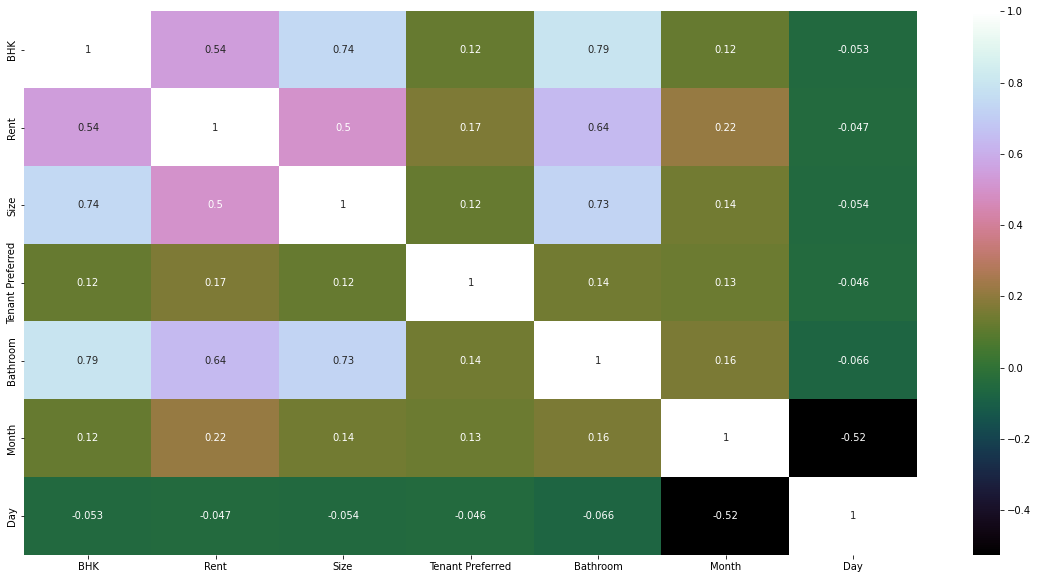

In [107]:
sns.heatmap(data=df.corr(), cmap='cubehelix', annot=True)

# Data Preprocessing

In [ ]:
df_1 = df.copy()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X = df_1.drop(['Rent'], axis=1)
y = df_1['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

train_column = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse=False), ["Area Type", "City", "Furnishing Status", 
                                          "Tenant Preferred", "Point of Contact"]),
    ('scaler', StandardScaler(), ["Size"])
], remainder="passthrough")

X = train_column.fit_transform(X)
X_test = train_column.transform(X_test)
y = y.values
y_test = y_test.values

In [ ]:
X

array([[0.0, 1.0, 0.0, ..., 18, '0', '2'],
       [0.0, 1.0, 0.0, ..., 13, '1', '3'],
       [0.0, 1.0, 0.0, ..., 16, '1', '3'],
       ...,
       [1.0, 0.0, 0.0, ..., 10, '3', '5'],
       [1.0, 0.0, 0.0, ..., 6, '23', '34'],
       [1.0, 0.0, 0.0, ..., 4, '4', '5']], dtype=object)

# Building the Model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X_test, y_test)

0.7935357635588051

In [ ]:
lin_reg.coef_

array([-1.05800536e+16, -1.05800536e+16, -8.34723923e+14, -8.34723923e+14,
       -8.34723923e+14, -8.34723923e+14, -8.34723923e+14, -8.34723923e+14,
       -6.50315191e+13, -6.50315191e+13, -6.50315191e+13, -2.86967541e+14,
       -2.86967541e+14, -2.86967541e+14, -1.37730574e+14, -1.37730574e+14,
        4.88636752e+03,  3.56437500e+03,  3.50956250e+03,  1.96875000e+02,
       -2.21250000e+01,  3.80000000e+01,  1.24000000e+02])

In [ ]:
lin_reg.intercept_

1.1904507142229204e+16

In [ ]:
lin_reg_train = np.sqrt(mean_squared_error(y, lin_reg.predict(X)))
lin_reg_test = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))

In [ ]:
print(lin_reg_train)
print(lin_reg_test)

9275.02371245012
9121.765648598148


In [ ]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {'normalize': [True, False]
          }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    },
    'random_forest_regression': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 150],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6],
            'criterion' :['mse', 'mae']
        }
    },
    'xgb_regressor': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50,100],
            'max_depth': [None, 3, 5],
            'eta': [0.5, 1, 2]
        }
    }
}

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
scores = []
best_estimators = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo, mp, in model_params.items():
  gs = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
  gs.fit(X, y)
  scores.append({
      'model': algo,
      'best_score': gs.best_score_,
      'best_params': gs.best_params_
  })
  best_estimators[algo] = gs.best_estimator_

df_models = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_models

In [ ]:
best_estimators

{'linear_regression': LinearRegression(normalize=False),
 'lasso': Lasso(alpha=1, selection='random'),
 'decision_tree': DecisionTreeRegressor(criterion='mse'),
 'random_forest_regression': RandomForestRegressor(criterion='mse', max_depth=6),
 'xgb_regressor': XGBRegressor(eta=0.5, max_depth=5)}

In [ ]:
best_estimators['xgb_regressor'].score(X_test, y_test)

0.9215317566805405

In [ ]:
best_estimators['random_forest_regression'].score(X_test, y_test)

0.8801312317172517

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
best_reg1 = best_estimators['xgb_regressor']
best_reg2 = best_estimators['random_forest_regression']

In [ ]:
best_reg1_pred = best_reg1.predict(X_test)
print(f'MAE of XGBRegressor: {round(mean_absolute_error(y_test, best_reg1_pred), 2)}')
print(f'\nMSE of XGBRegressor: {round(mean_squared_error(y_test, best_reg1_pred), 2)}')
print(f'\nR2 Score of XGBRegressor: {r2_score(y_test, best_reg1_pred)}')

MAE of XGBRegressor: 3947.44

MSE of XGBRegressor: 31623280.22

R2 Score of XGBRegressor: 0.9215317566805405


In [ ]:
best_reg2_pred = best_reg2.predict(X_test)
print(f'MAE of Random Forest Regressor: {round(mean_absolute_error(y_test, best_reg2_pred), 2)}')
print(f'\nMSE of Random Forest Regressor: {round(mean_squared_error(y_test, best_reg2_pred), 2)}')
print(f'\nR2 Score of Random Forest Regressor: {r2_score(y_test, best_reg2_pred)}')

MAE of Random Forest Regressor: 4852.68

MSE of Random Forest Regressor: 48307996.83

R2 Score of Random Forest Regressor: 0.8801312317172517


# Saving Results

In [ ]:
import pickle
with open('House_Rent_Prediction_Model_1.pickle', 'wb') as f:
  pickle.dump(best_reg1, f)

In [ ]:
with open('House_Rent_Prediction_Model_2.pickle', 'wb') as f:
  pickle.dump(best_reg2, f)

# Conclusion

 - Mumbai, Chennai, Bangalore and Hyderabad are the most popular cities for renting houses.
 
 - 72.6% house owners prefer to rent their homes to both family and bachelors.

 - Mostly, people rent from 1 to 4 floor and 47.4% take a semi-furnished house or an unfurnished house, which definitely affect the price.

 - The most expensive house rental in Mumbai, the cheapest - in Hydrabad. The average rental price in Delhi and Bangalore.
 
 - Hydrabad listed rental homes with the highest average house size compared with other cities.

 - Homes listed in the carpet area have the highest average rent compared to the super area.

 - 'Size', 'BHK', 'Bathroom' have high correlation.

 - In the process of training models, the model 'XGBRegressor' showed the best result with accuracy 92%.